Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [114]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
#Reading the file
df=pd.read_csv(r"C:\Users\One\Desktop\Excelr\Assignments\6/bank-full.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [57]:
df.duplicated().sum() #Check for duplicated values

0

In [58]:
df.shape

(45211, 17)

In [59]:
df.isnull().sum() #Check for Null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [60]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## EDD

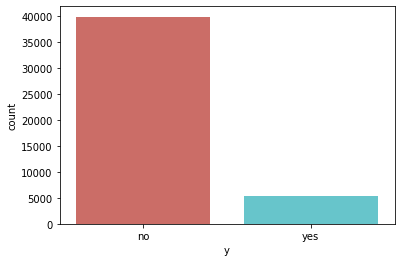

In [61]:
sns.countplot(x='y',data=df, palette='hls') 
plt.show()

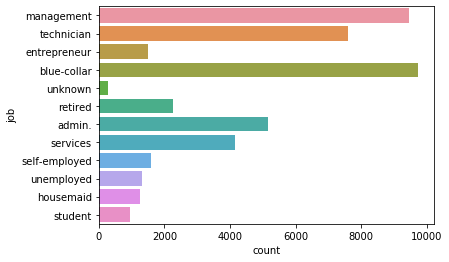

In [62]:
sns.countplot(y="job", data=df)
plt.show()

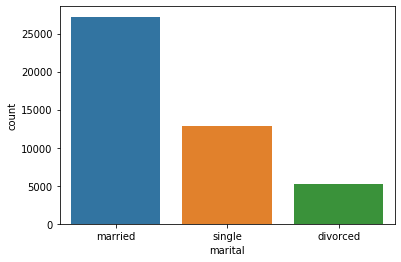

In [63]:
sns.countplot(x="marital", data=df)
plt.show()

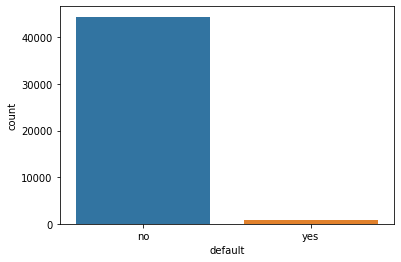

In [64]:
sns.countplot(x="default", data=df)
plt.show()

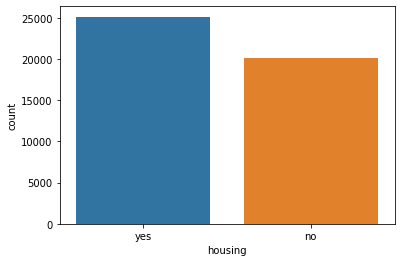

In [65]:
sns.countplot(x="housing", data=df)
plt.show()

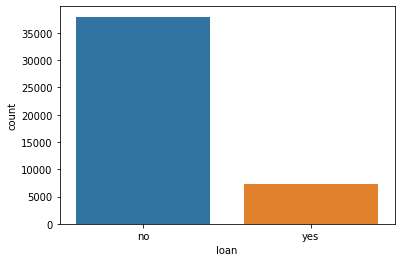

In [66]:
sns.countplot(x="loan", data=df)
plt.show()

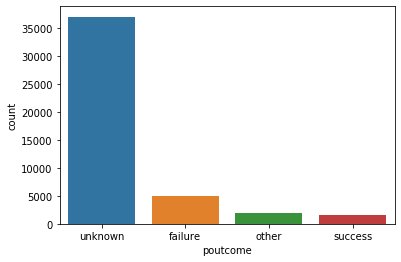

In [67]:
sns.countplot(x="poutcome", data=df)
plt.show()

In [68]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [69]:
column=['age', 'balance', 'duration', 'campaign', 'y'] #Using only significat variable for model bulding

In [70]:
df=df[column]

In [71]:
df.head()

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no


In [72]:
df.info() #Information Regarding the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


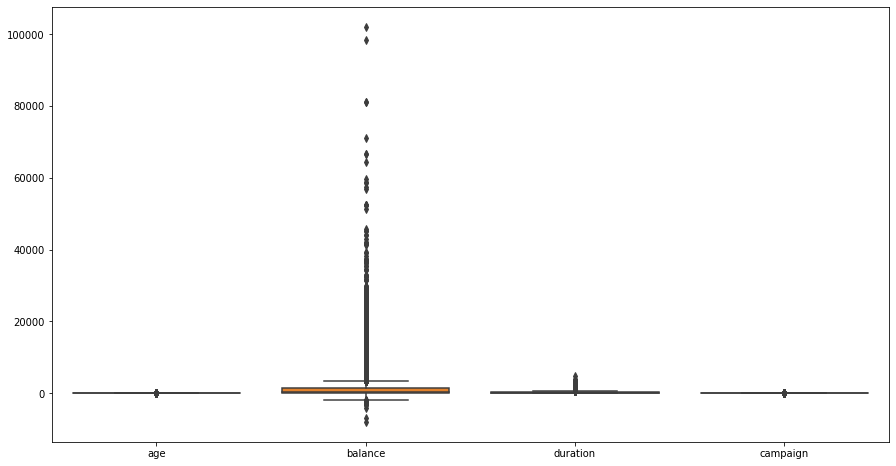

In [73]:
plt.figure(figsize=(15,8))
sns.boxplot(data =df,orient = "v")
plt.show()

In [74]:
df.y=df.y.map({'no':0, 'yes':1}) #Mapping categorial value into 0 and 1

In [76]:
df.tail()

,age,balance,duration,campaign,y
45206,51,825,977,3,1
45207,71,1729,456,2,1
45208,72,5715,1127,5,1
45209,57,668,508,4,0
45210,37,2971,361,2,0


In [92]:
#Partitioning the data into train data and test data
X=df.iloc[:,:-1]
y=df['y']

In [93]:
X.shape , y.shape

((45211, 4), (45211,))

In [94]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [95]:
lr=LogisticRegression()

In [96]:
lr.fit(X,y)

LogisticRegression()

In [97]:
lr.coef_

array([[ 7.69721596e-03,  3.72191063e-05,  3.54908899e-03,
        -1.39828307e-01]])

In [99]:
lr.predict_proba(X)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553763, 0.69446237],
       [0.82336233, 0.17663767],
       [0.86407825, 0.13592175]])

In [100]:
y_pred=lr.predict(X) #Predicting the value using model

In [101]:
Result=pd.DataFrame({'Original':y,'Predicted':y_pred})

In [103]:
Result.head()

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [105]:
confusion_matrix(y,y_pred)

array([[39342,   580],
       [ 4435,   854]], dtype=int64)

In [106]:
cm=confusion_matrix(y,y_pred)

In [107]:
cm

array([[39342,   580],
       [ 4435,   854]], dtype=int64)

In [113]:
print("The Accuracy of the Model is", round((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]),4)*100, "%")

The Accuracy of the Model is 88.91 %


In [115]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211

